In [1]:
#importing modules

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mtp
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
#reading the datasets
AP_data = pd.read_csv('/content/Admission_Predict.csv', engine='python', encoding='utf-8', error_bad_lines=False)
len(AP_data)

400

##Data Preprocessing

In [4]:
#handling missing values
AP_data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

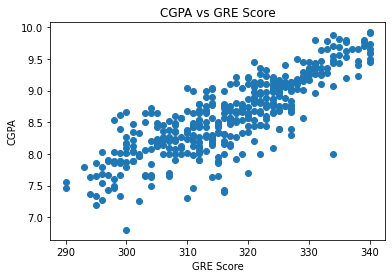

In [5]:
plt.scatter(AP_data['GRE Score'],AP_data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

Skewness of chance of admit :  -0.3534480999327828


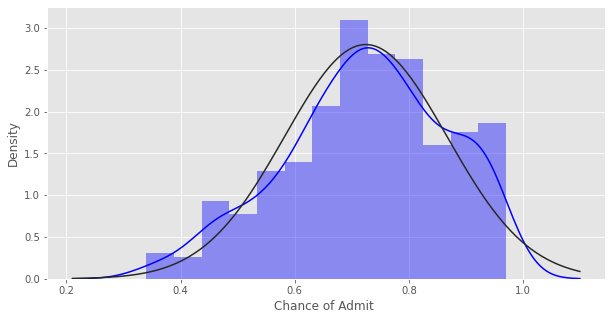

In [6]:
#Data Visualization
plt.style.use('ggplot')
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
# lets see the distribution for the target variable
print('Skewness of chance of admit : ',AP_data['Chance of Admit '].skew())
plt.figure(figsize = (10,5))
sns.distplot(AP_data['Chance of Admit '],kde = True,color = 'b',fit = stats.norm)
plt.show()

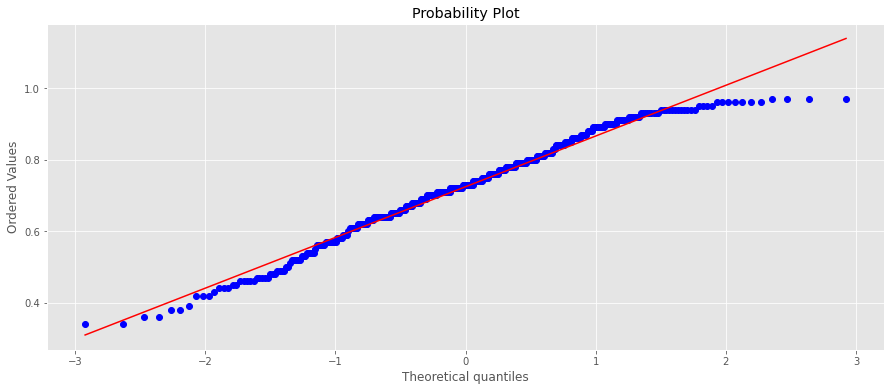

In [7]:
fig, ax = plt.subplots(figsize=(15,6))
rs = stats.probplot(AP_data['Chance of Admit '],plot = ax)
plt.show()

In [8]:
#Splitting dependant and independant data
x = AP_data.iloc[:,0:7].values
x

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   4.5 ,   9.65],
       [  2.  , 324.  , 107.  , ...,   4.  ,   4.5 ,   8.87],
       [  3.  , 316.  , 104.  , ...,   3.  ,   3.5 ,   8.  ],
       ...,
       [398.  , 330.  , 116.  , ...,   5.  ,   4.5 ,   9.45],
       [399.  , 312.  , 103.  , ...,   3.5 ,   4.  ,   8.78],
       [400.  , 333.  , 117.  , ...,   5.  ,   4.  ,   9.66]])

In [ ]:
y = AP_data.iloc[:,7:].values
y

In [10]:
x.shape

(400, 7)

In [11]:
y.shape

(400, 2)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

##Training the model

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=400, random_state=90)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [20]:
y_pred

array([[0.32    , 0.697275],
       [0.1475  , 0.706225],
       [0.9925  , 0.777625],
       [0.165   , 0.68575 ],
       [0.2625  , 0.73815 ],
       [0.58    , 0.553575],
       [0.2925  , 0.728775],
       [0.59    , 0.686525],
       [0.99    , 0.91615 ],
       [1.      , 0.925225],
       [0.185   , 0.506275],
       [1.      , 0.9118  ],
       [0.7025  , 0.711475],
       [0.0075  , 0.481125],
       [0.8275  , 0.8229  ],
       [0.5825  , 0.580125],
       [0.5525  , 0.66035 ],
       [0.9925  , 0.83315 ],
       [0.4025  , 0.636825],
       [0.43    , 0.756225],
       [0.9825  , 0.84285 ],
       [0.935   , 0.8536  ],
       [0.4825  , 0.6385  ],
       [0.0025  , 0.45335 ],
       [0.685   , 0.812425],
       [0.48    , 0.6453  ],
       [0.1025  , 0.44565 ],
       [0.63    , 0.60875 ],
       [0.9775  , 0.867825],
       [0.3575  , 0.663875],
       [0.2525  , 0.64395 ],
       [0.97    , 0.750025],
       [0.6175  , 0.7479  ],
       [0.1075  , 0.6102  ],
       [0.69  

In [15]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18718281249999996
Mean Squared Error: 0.09025547273437498
Root Mean Squared Error: 0.30042548615983794


In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18718281249999996
Mean Squared Error: 0.09025547273437498
Root Mean Squared Error: 0.30042548615983794


In [ ]:
admit_chance_pred = pd.DataFrame({'Actual_value':y_test, 'Predicted_value_using_r': y_pred})
admit_chance_pred.head()
#print(admit_chance_pred[:5])

In [ ]:
y_pred

In [ ]:
prediction = regressor.predict(x_test)
print("ORIGINAL DATA")
print(y_test)
print()
print("PREDICTED DATA")
print(prediction)

In [22]:
import joblib
joblib.dump(regressor, 'model.pkl')

['model.pkl']